In [3]:
# Unipê - Centro Universitário de João Pessoa
# Ciência de Dados com Python + Pandas, Numpy, SkLearning.
# Machine Learning - Regressão
# Grupo: Ayrton Tavares de Souza, Johallyson Medeiros, Letícia Bento e Luan Caetano Silva Santos

#Importando a biblioteca pandas para carregar e visualizar a base de dados
import pandas as pd

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


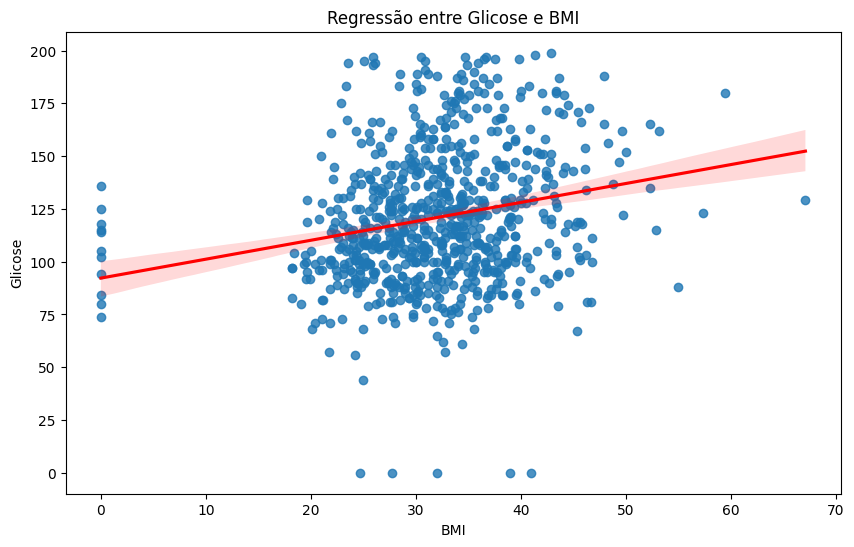

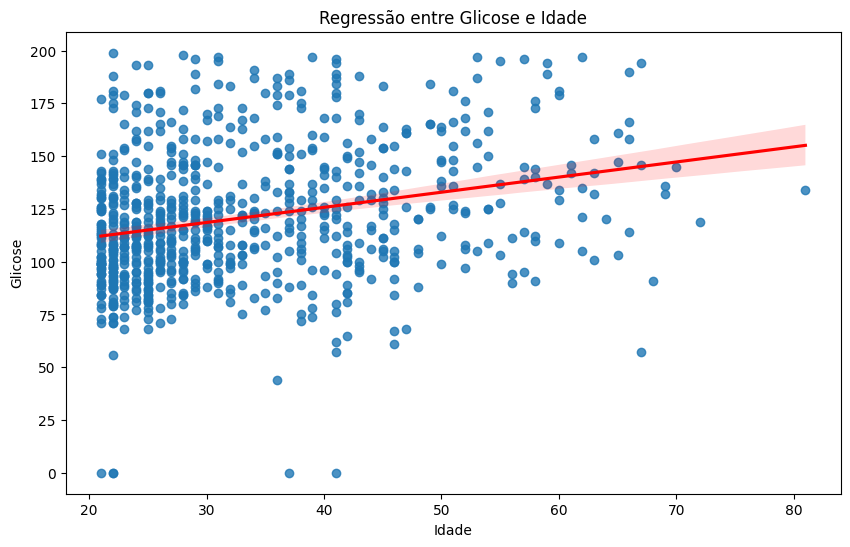

Erro Quadrático Médio (MSE): 896.5010298647728
Coeficiente de Determinação (R²): 0.10911952588069951


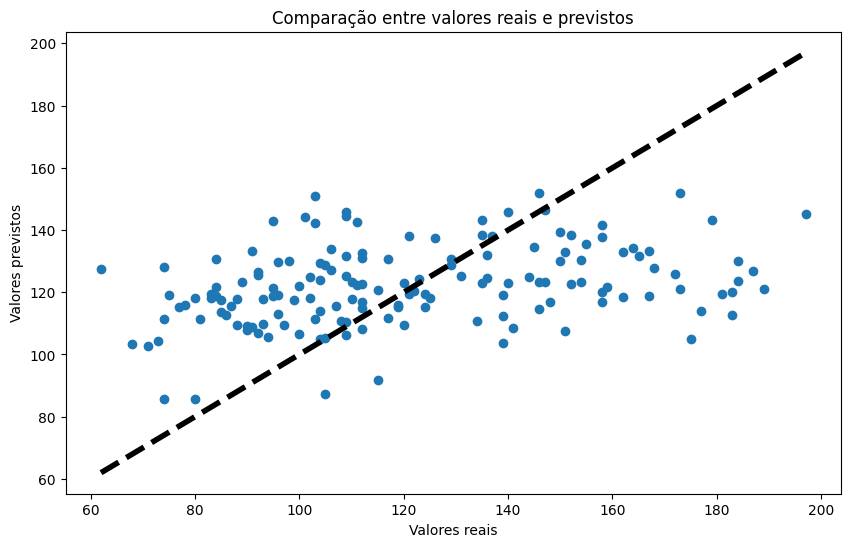

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Carregar dados do CSV
df = pd.read_csv('diabetess.csv')

# Verificar as colunas do DataFrame carregado
print(df.columns)

# Renomear as colunas do DataFrame para corresponder aos nomes desejados
df.columns = ['Gravidez', 'Glicose', 'PressaoSanguinea', 'EspessuraPele', 'Insulina', 'BMI', 'FuncaoPedigreeDiabetes', 'Idade', 'Resultado']

# Conectar ao banco de dados SQLite (ou criar se não existir)
conn = sqlite3.connect('diabetes_regressao.db')

# Inserir dados no banco de dados
df.to_sql('medicoes', conn, if_exists='replace', index=False)

# Consultar os dados da tabela
dados_df = pd.read_sql_query('SELECT Glicose, BMI, Idade FROM medicoes', conn)

# Fechar a conexão com o banco de dados
conn.close()

# Visualização dos dados
# Gráfico de regressão entre Glicose e BMI
plt.figure(figsize=(10, 6))
sns.regplot(data=dados_df, x='BMI', y='Glicose', line_kws={"color": "red"})
plt.title('Regressão entre Glicose e BMI')
plt.xlabel('BMI')
plt.ylabel('Glicose')
plt.show()

# Gráfico de regressão entre Glicose e Idade
plt.figure(figsize=(10, 6))
sns.regplot(data=dados_df, x='Idade', y='Glicose', line_kws={"color": "red"})
plt.title('Regressão entre Glicose e Idade')
plt.xlabel('Idade')
plt.ylabel('Glicose')
plt.show()

# Preparar os dados para o modelo de regressão
X = df[['BMI', 'Idade']]
y = df['Glicose']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")

# Gráfico de comparação entre os valores reais e previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Comparação entre valores reais e previstos')
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.show()
